In [34]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import time
from py import metrics

In [35]:
def getNeighbours(data, corePoint, eps):
    
    def EuclideanDistance(p1, p2):
        return  np.sqrt(np.sum(np.square(p1 - p2)))
    
    neighbours = []
    
    for i in range(len(data)):
        dist = EuclideanDistance(data[i], data[corePoint])
        
        if dist < eps:
            neighbours.append(i)
            
    return neighbours

In [36]:
def dbScan(data, eps, MinPts):
    """
    Impletmentation of Density-based spatial clustering of applications with noise(DBSCAN) 
    @param Input Data
    @param epsilon value
    @param Minimum number of points
    @return Predicted labels by DBSCAN clustering
    """
    def growCluster(data, labels, corePoint, 
                    neighbours, clusterID, eps, MinPts):
        labels[corePoint] = clusterID
        i = 0
        while i < len(neighbours):    
            nh = neighbours[i]

            if labels[nh] == -1:
                labels[nh] = clusterID
            elif labels[nh] == 0:
                labels[nh] = clusterID
                PnNeighbours = getNeighbours(data, nh, eps)

                if len(PnNeighbours) >= MinPts:
                    neighbours = neighbours + PnNeighbours
            i += 1
            
    labels = np.zeros(len(data))
    clusterID = 0
    
    for p in range(len(data)):
        if labels[p] == 0:
            neighbours = getNeighbours(data, p, eps)
            
            if len(neighbours) < MinPts:
                labels[p] = -1
            else:
                clusterID += 1
                growCluster(data, labels, p, neighbours, 
                            clusterID, eps, MinPts)
                
    return labels

In [37]:
def numNoise(labels):
    """
    @param labels: Predicted labels
    @return number of noise determined by cluster algorithm 
    """
    return int(abs(np.sum(labels[labels < 0])))
    
def nClusters(labels):
    """
    @param labels: Predicted labels
    @return number of cluseters 
    """
    return len(np.unique(labels[labels > 0]))

In [38]:
pathBased = pd.read_csv('dataset1.csv', 
                        names = ['value_1','value_2','true_label'],  
                        header=None)
c=10
pbX = pathBased.iloc[:,[0,1]]
pby = pathBased.iloc[:,[2]]

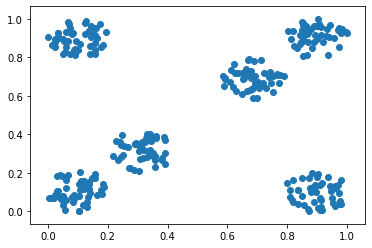

In [39]:
for column in pbX.columns:
    pbX.loc[:, column] = (pbX[column].values - pbX[column].min())/(pbX[column].max() - pbX[column].min())
      
plt.scatter(pbX['value_1'],pbX['value_2'])
plt.show()

In [40]:
sT = 0.5*time.time()
labels = dbScan(pbX.values, 0.12, 4)
eT = 1.5*time.time()
numClusters = nClusters(labels)
acc = (numClusters)/len(labels)*c
pby.loc[:,'predict_label'] = labels

number of clusters = 5
number of noise points = 0
accuracy:  0.16666666666666666
Time taken by DBSCAN 1596086869.805 microseconds


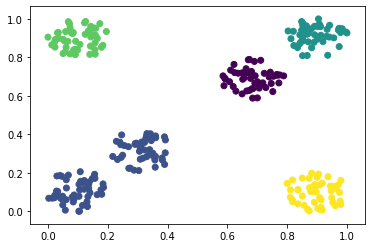

In [41]:
print('number of clusters = {}'.format(numClusters))
print('number of noise points = {}'.format(numNoise(labels)))
print("accuracy: ",acc)
print('Time taken by DBSCAN {:.3f} microseconds'.format(eT-sT))


plt.scatter(pbX['value_1'],pbX['value_2'], c = labels)
plt.show()